# Salary Prediction using Linear Regression

In [3]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [4]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA

In [72]:
x = df[['Experience Years']]
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [70]:
y = df[['Salary']]
y.head()

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


In [71]:
x_mean = x.mean()
x_mean

Experience Years    5.1525
dtype: float64

In [29]:
y_mean = y.mean()
y_mean

Salary    74743.625
dtype: float64

Text(0.5, 1.0, 'Salary with Experience')

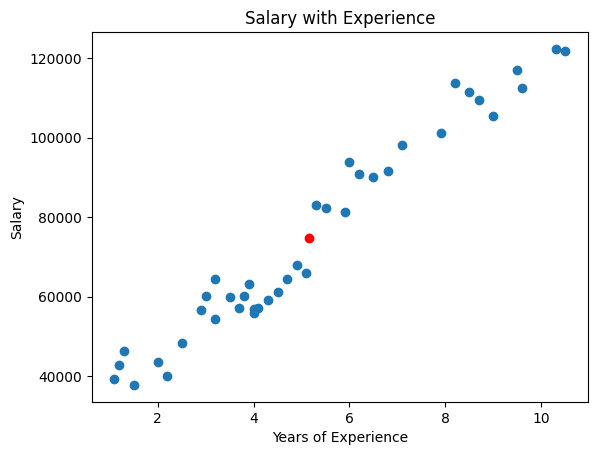

In [30]:
plt.scatter(x, y)
plt.scatter(x_mean, y_mean, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary with Experience')

# Linear Regression

In [19]:
# import linear regression function from sklearn
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [82]:
# train the model
reg.fit(x, y)

LinearRegression()

In [34]:
m = reg.coef_
m

array([[9523.65050742]])

In [35]:
c = reg.intercept_
c

array([25673.01576053])

In [69]:
# predict y
y1 = m * 7 + c
y1

array([[92338.56931245]])

In [83]:
reg.predict([[7]])  # results are identical

C:\Users\islam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92338.56931245]])

In [41]:
# predict y using the predict function
df['predicted_salary'] = reg.predict(x)
df.head()

,Experience Years,Salary,predicted_salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


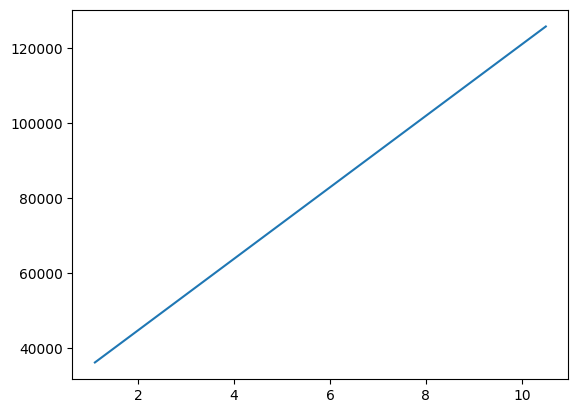

In [56]:
# best fit line
plt.plot(x, reg.predict(x))

Text(0.5, 1.0, 'Salary with Experience')

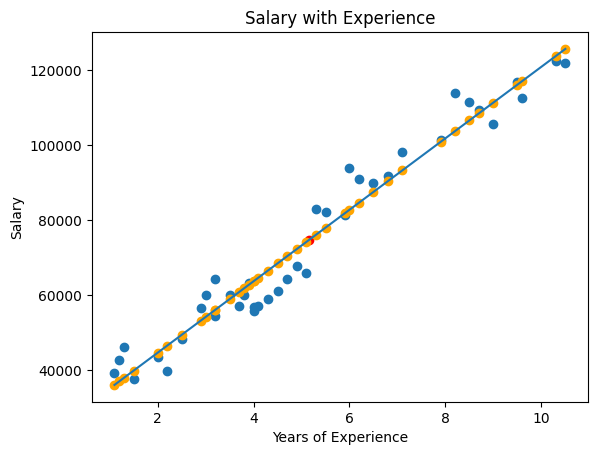

In [57]:
plt.plot(x, reg.predict(x))
plt.scatter(x_mean, y_mean, color='red')
plt.scatter(df['Experience Years'], df['Salary'])
plt.scatter(df['Experience Years'], df['predicted_salary'], color='orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary with Experience')

# Cost & Lose

In [60]:
# loss is salary given minus predicted salary
df['loss'] = df['Salary'] - df['predicted_salary']
df.head()

,Experience Years,Salary,predicted_salary,loss
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [61]:
# Use MAE, MSE to determine cost
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [63]:
mae = mean_absolute_error(df['Salary'], df['predicted_salary'])
mae

4516.281792544623

In [64]:
df['loss'].head()

0    3193.968681
1    5672.603631
2    8151.238580
3   -2227.491522
4   -1195.316775
Name: loss, dtype: float64

In [66]:
# manually calculating to cross check with MAE function. sum of absolute value of loss column divided by number of rows
sum(abs(df['loss']))/ len(x)

4516.281792544623

manual calculation and the MAE function results are identical

In [67]:
mse = mean_squared_error(df['Salary'], df['predicted_salary'])
mse

28960383.65377621

## Performance

In [73]:
# using years or x values and salary or y values
reg.score(x, y)

0.9558814451799361

In [74]:
from sklearn.metrics import r2_score

In [85]:
# using salary or y values and predicted_salary values
r2_score(y, reg.predict(x))

0.9558814451799361